### BOOK RATING PREDICTION

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"D:\Notes\Cours\DSTI\Machine Learning\Project 1\books.csv", on_bad_lines='skip')

In [4]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


#### Shape of the data

In [6]:
print(df.shape)

(11123, 12)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


#### Missing Report

In [9]:
df.isna().any()

bookID                False
title                 False
authors               False
average_rating        False
isbn                  False
isbn13                False
language_code         False
  num_pages           False
ratings_count         False
text_reviews_count    False
publication_date      False
publisher             False
dtype: bool

`There are no null values in our Dataset.`

In [11]:
# Checking for duplicate rows
duplicates = df.duplicated()

# Displaying duplicate rows
duplicate_rows = df[duplicates]
print(duplicate_rows)

Empty DataFrame
Columns: [bookID, title, authors, average_rating, isbn, isbn13, language_code,   num_pages, ratings_count, text_reviews_count, publication_date, publisher]
Index: []


In [12]:
# Counting duplicate rows
num_duplicates = duplicates.sum()
num_duplicates

0

In [13]:
df.nunique()

bookID                11123
title                 10348
authors                6639
average_rating          209
isbn                  11123
isbn13                11123
language_code            27
  num_pages             997
ratings_count          5294
text_reviews_count     1822
publication_date       3679
publisher              2290
dtype: int64

In [14]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


### Data Cleaning

In [16]:
# Standardizing column names
df.columns = df.columns.str.lower().str.replace('_', ' ')
print("Standardized column names:\n", df.columns)

Standardized column names:
 Index(['bookid', 'title', 'authors', 'average rating', 'isbn', 'isbn13',
       'language code', '  num pages', 'ratings count', 'text reviews count',
       'publication date', 'publisher'],
      dtype='object')


In [17]:
# Converting publication_date to datetime
df['publication date'] = pd.to_datetime(df['publication date'], errors='coerce')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   bookid              11123 non-null  int64         
 1   title               11123 non-null  object        
 2   authors             11123 non-null  object        
 3   average rating      11123 non-null  float64       
 4   isbn                11123 non-null  object        
 5   isbn13              11123 non-null  int64         
 6   language code       11123 non-null  object        
 7     num pages         11123 non-null  int64         
 8   ratings count       11123 non-null  int64         
 9   text reviews count  11123 non-null  int64         
 10  publication date    11121 non-null  datetime64[ns]
 11  publisher           11123 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 1.0+ MB


In [19]:
df.isna().sum()

bookid                0
title                 0
authors               0
average rating        0
isbn                  0
isbn13                0
language code         0
  num pages           0
ratings count         0
text reviews count    0
publication date      2
publisher             0
dtype: int64

In [20]:
df[df['publication date'].isnull()]

,bookid,title,authors,average rating,isbn,isbn13,language code,num pages,ratings count,text reviews count,publication date,publisher
8177,31373,In Pursuit of the Proper Sinner (Inspector Lyn...,Elizabeth George,4.10,0553575104,9780553575101,eng,718,10608,295,NaT,Bantam Books
11094,45531,Montaillou village occitan de 1294 à 1324,Emmanuel Le Roy Ladurie/Emmanuel Le Roy-Ladurie,3.96,2070323285,9782070323289,fre,640,15,2,NaT,Folio histoire


##### Since two dates are missing from the dataset, we found the publishing dates from the internet and placed them in our dataset.

In [22]:
df.loc[df.bookid == 31373, 'publication date'] = '1999-07-31 00:00:00'
df.loc[df.bookid == 45531, 'publication date'] = '1975-11-05 00:00:00'

In [23]:
df['language code'].unique()

array(['eng', 'en-US', 'fre', 'spa', 'en-GB', 'mul', 'grc', 'enm',
       'en-CA', 'ger', 'jpn', 'ara', 'nl', 'zho', 'lat', 'por', 'srp',
       'ita', 'rus', 'msa', 'glg', 'wel', 'swe', 'nor', 'tur', 'gla',
       'ale'], dtype=object)

In [24]:
# Unifying the langauge codes
eng = {'language code':{'en-US': 'eng', 'en-GB': 'eng', 'en-CA': 'eng'}}
df.replace(eng, inplace=True)

In [25]:
# Extracting year of publication in a separate column
df['year'] = pd.DatetimeIndex(df['publication date']).year

In [26]:
# Renaming the column to remove leading whitespaces
df.rename(columns = {'  num pages': 'num pages'}, inplace=True) 

In [27]:
# Filtering the rows where 'num pages' is 0
books_with_zero_pages = df[df['num pages'] == 0]

# Counting the number of such books
number_of_books_with_zero_pages = books_with_zero_pages.shape[0]

print(f"Number of books with 0 pages: {number_of_books_with_zero_pages}")

Number of books with 0 pages: 76


In [28]:
# Dropping books with 0 pages
df = df[df['num pages']>0]

In [29]:
# Adding new features into our dataset
df['rating weight by text reviews'] = df['average rating'] * df['text reviews count']
df['rating weight by ratings'] = df['average rating'] * df['ratings count']
df['rating per page'] = df['average rating'] * df['num pages']

In [30]:
df.describe()

,bookid,average rating,isbn13,num pages,ratings count,text reviews count,publication date,year,rating weight by text reviews,rating weight by ratings,rating per page
count,11047.000000,11047.000000,1.104700e+04,11047.000000,1.104700e+04,11047.000000,11047,11047.000000,11047.000000,1.104700e+04,11047.000000
mean,21310.713406,3.934135,9.759735e+12,338.719924,1.806368e+04,545.676021,2000-08-27 18:11:18.482845952,2000.166742,2177.341596,7.258138e+04,1345.354398
min,1.000000,0.000000,8.987060e+09,1.000000,0.000000e+00,0.000000,1900-01-01 00:00:00,1900.000000,0.000000,0.000000e+00,0.000000
25%,10266.000000,3.770000,9.780345e+12,196.000000,1.090000e+02,9.000000,1998-07-16 12:00:00,1998.000000,36.000000,4.207400e+02,777.140000
50%,20252.000000,3.960000,9.780571e+12,301.000000,7.620000e+02,47.000000,2003-02-27 00:00:00,2003.000000,186.590000,2.987600e+03,1161.090000
75%,32109.000000,4.130000,9.780872e+12,416.000000,5.048000e+03,241.000000,2005-09-27 00:00:00,2005.000000,939.840000,2.007086e+04,1651.990000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000,2020-03-31 00:00:00,2020.000000,379669.970000,1.650562e+07,30907.200000
std,13106.738716,0.350276,4.444937e+11,240.355399,1.128759e+05,2585.092278,NaN,8.243152,10423.694440,4.547795e+05,1024.540868


In [31]:
df.columns

Index(['bookid', 'title', 'authors', 'average rating', 'isbn', 'isbn13',
       'language code', 'num pages', 'ratings count', 'text reviews count',
       'publication date', 'publisher', 'year',
       'rating weight by text reviews', 'rating weight by ratings',
       'rating per page'],
      dtype='object')

### Exploratory Data Analysis

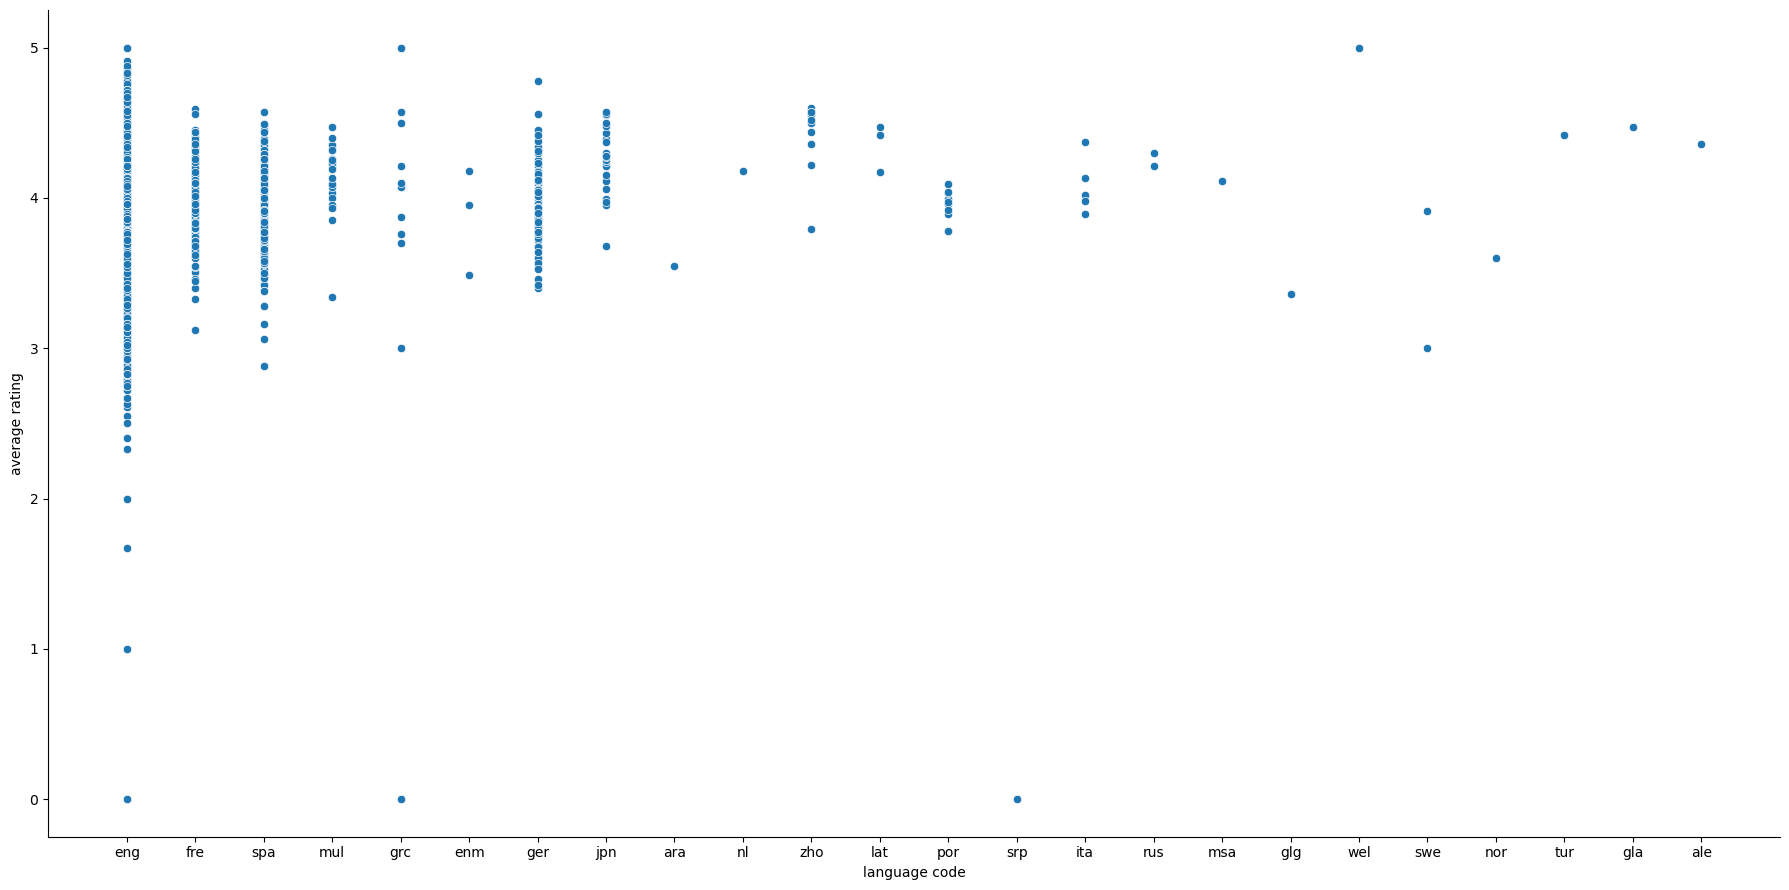

In [33]:
sns.relplot(x="language code", y="average rating", data=df, height=9, aspect = 2)
plt.show()

C:\Users\lenyb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenyb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='year', ylabel='average rating'>

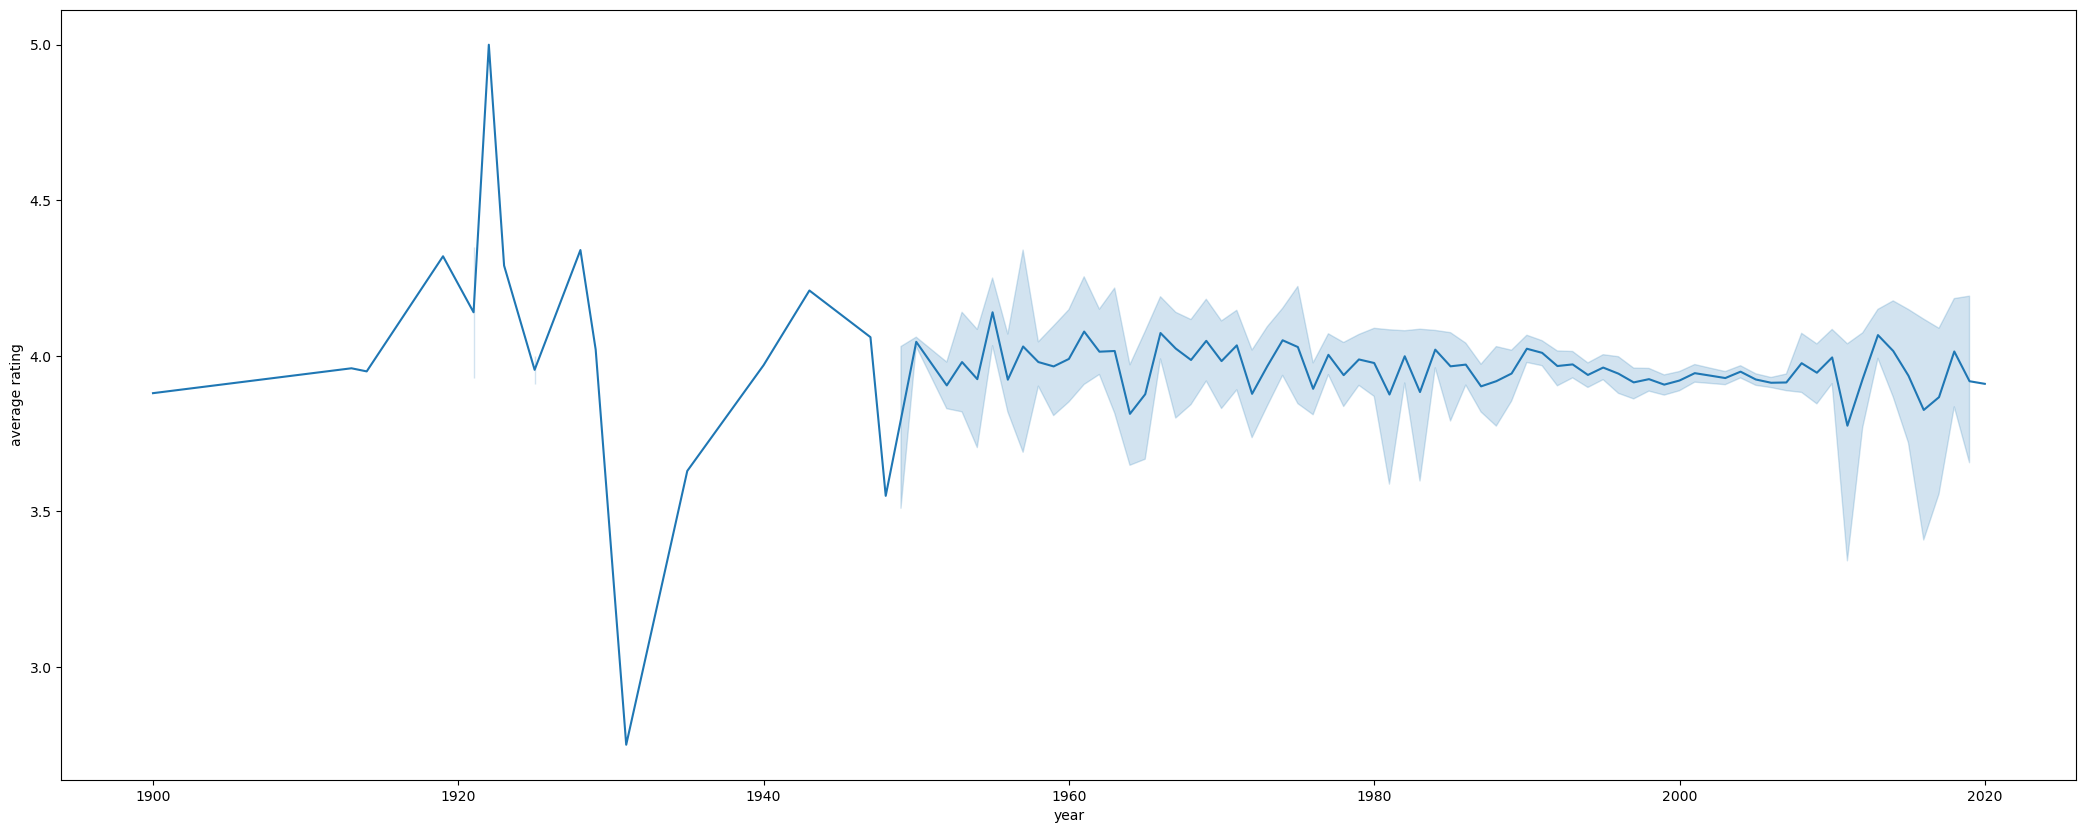

In [34]:
fig = plt.gcf()
fig.set_size_inches(26, 10)
sns.lineplot(x="year", y="average rating", data=df)

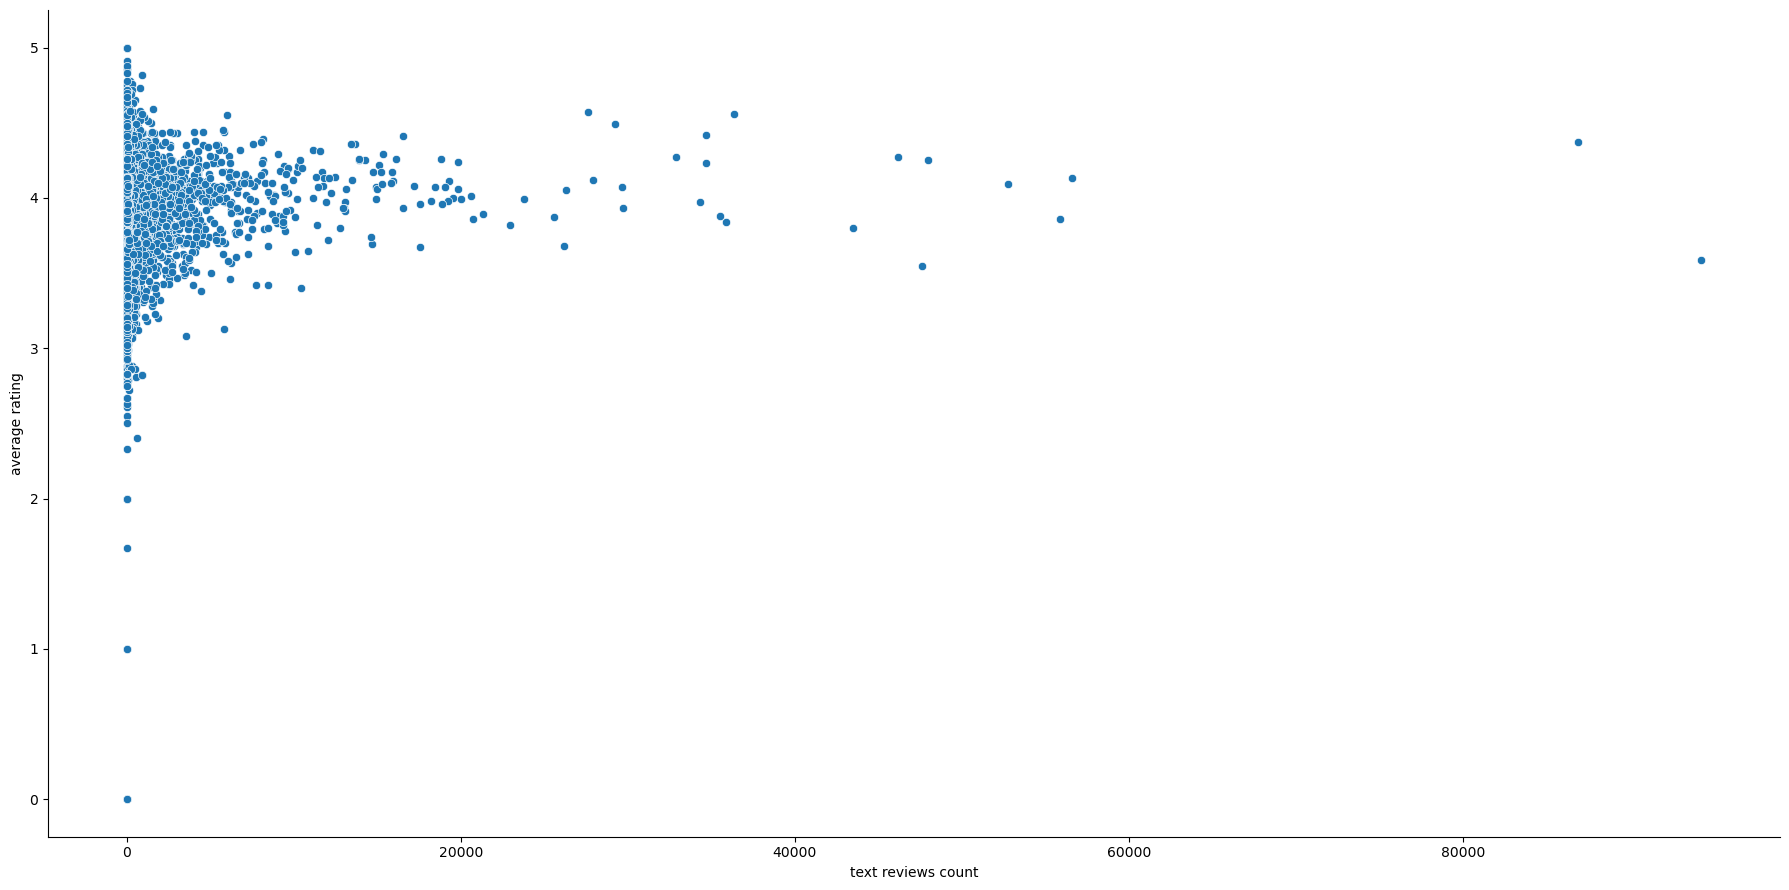

In [35]:
sns.relplot(x="text reviews count", y="average rating", data=df, height=9, aspect = 2)
plt.show()

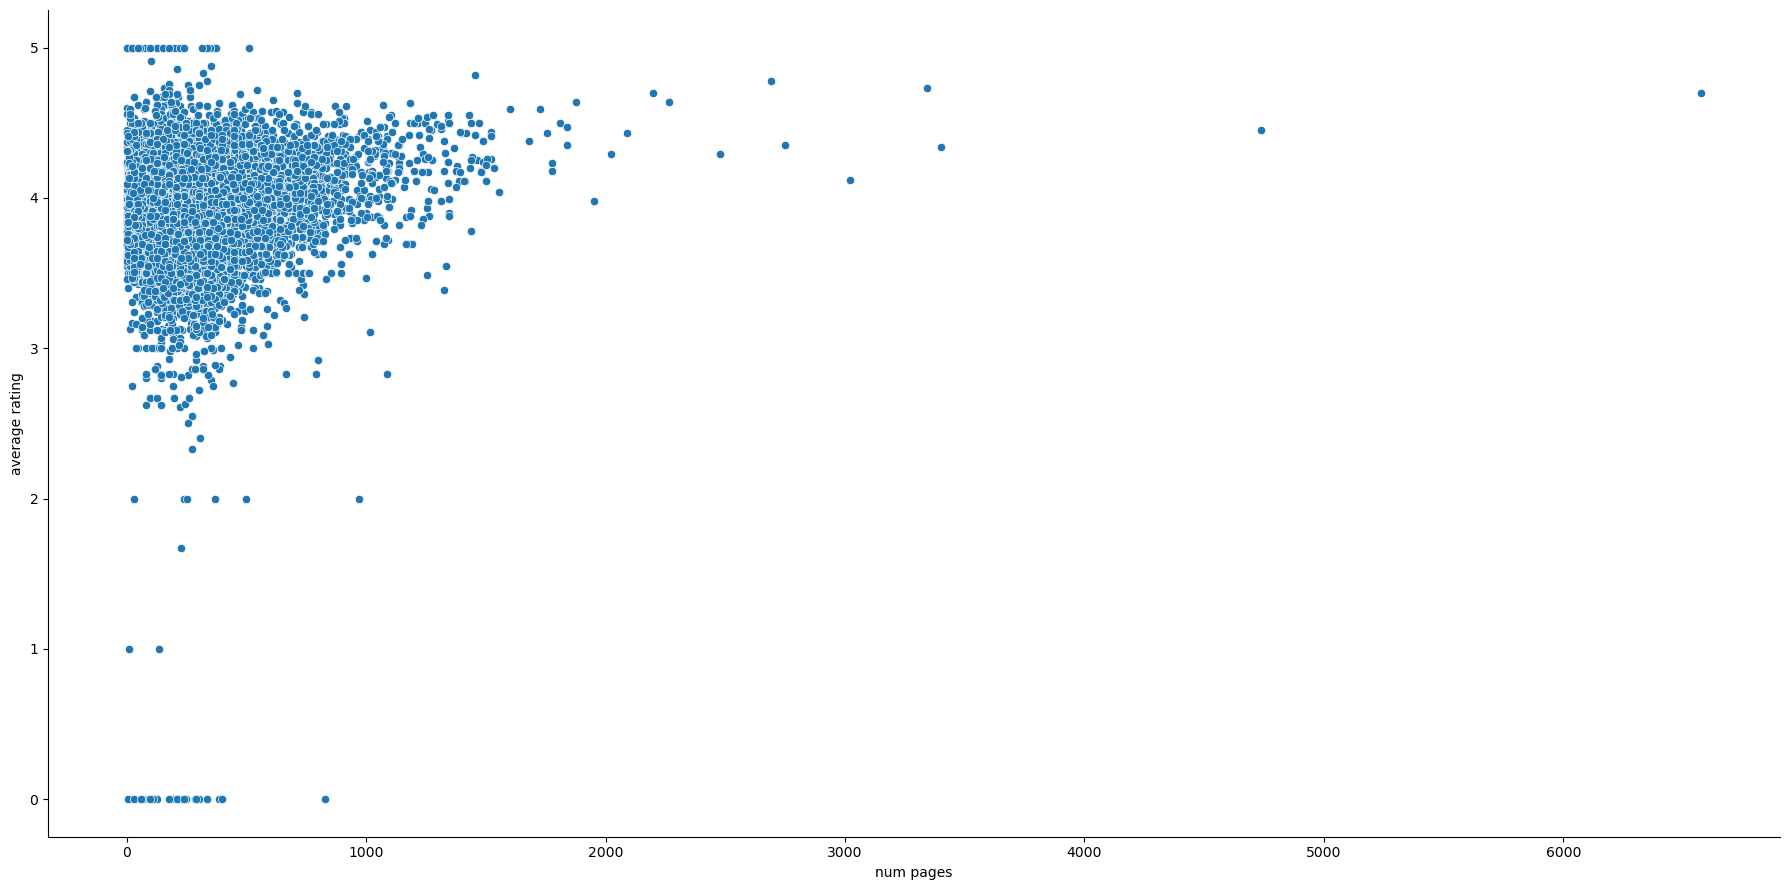

In [36]:
sns.relplot(x="num pages", y="average rating", data=df, height=9, aspect = 2)

C:\Users\lenyb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenyb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='year', ylabel='text reviews count'>

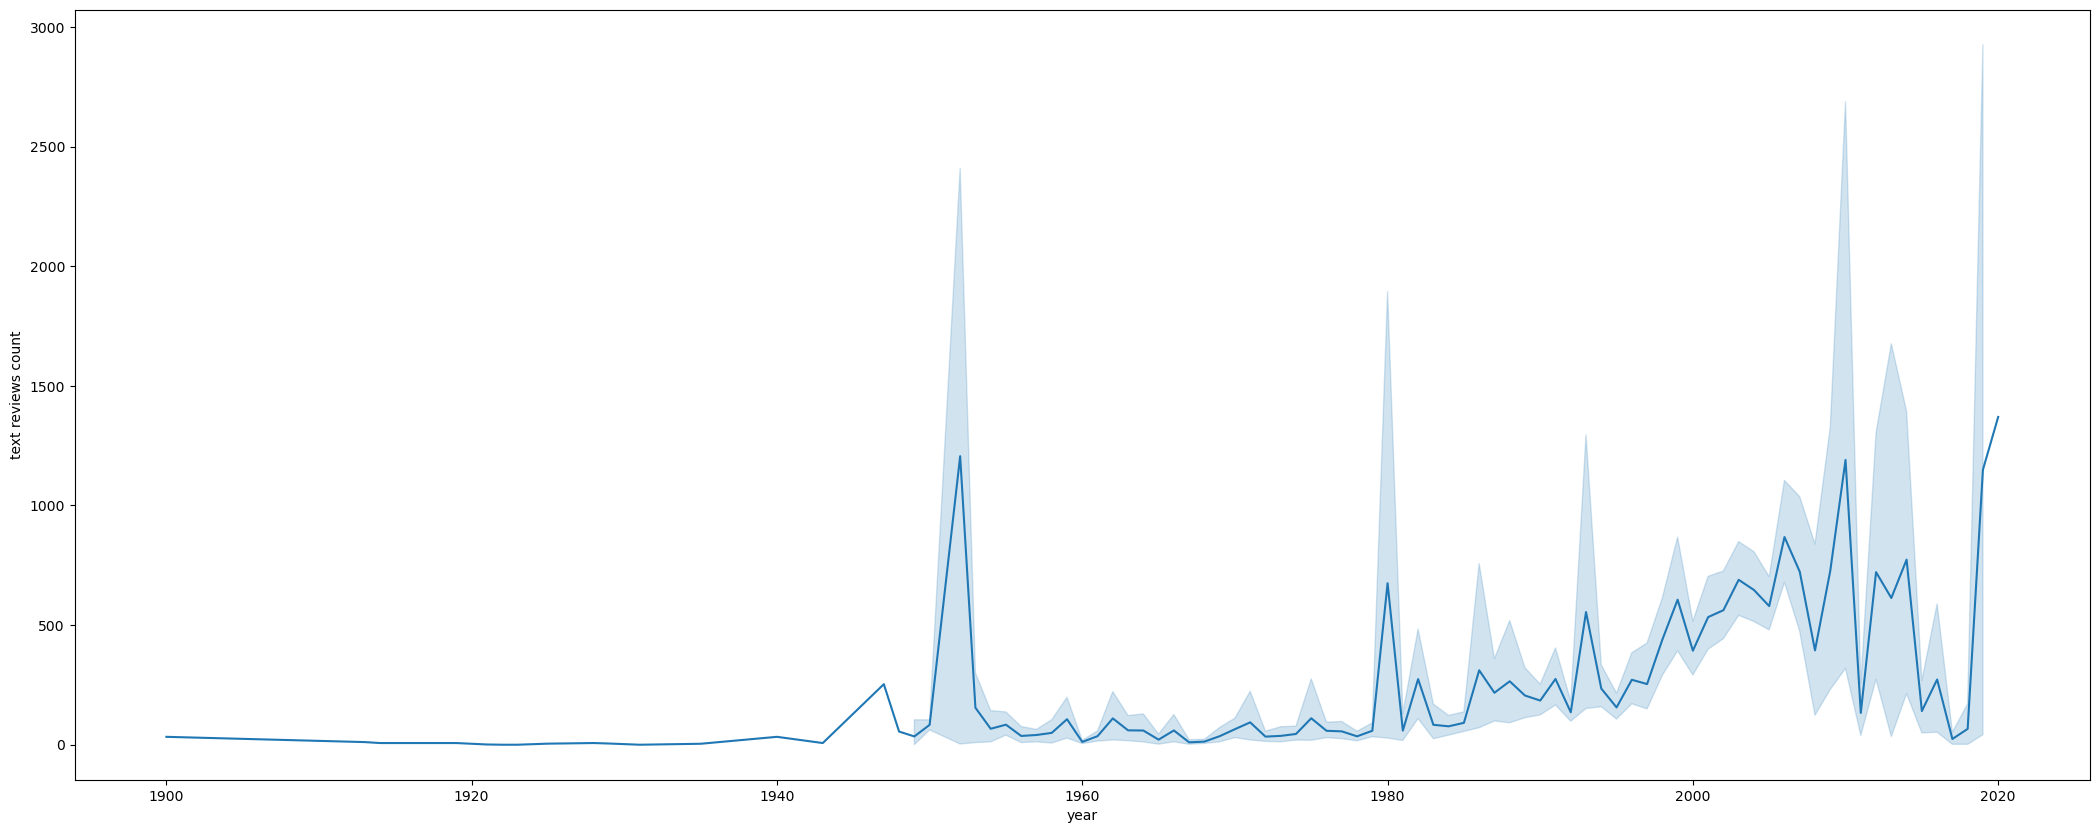

In [37]:
fig = plt.gcf()
fig.set_size_inches(26, 10)
sns.lineplot(x="year", y="text reviews count", data=df)

In [38]:
df['authors'].value_counts().head(10)

authors
Stephen King        40
P.G. Wodehouse      40
Rumiko Takahashi    39
Orson Scott Card    35
Agatha Christie     33
Piers Anthony       30
Sandra Brown        29
Mercedes Lackey     29
Dick Francis        28
Terry Pratchett     23
Name: count, dtype: int64

In [39]:
df['language code'].value_counts().head(5)

language code
eng    10464
spa      217
fre      143
ger       98
jpn       46
Name: count, dtype: int64

In [40]:
df['publisher'].value_counts().head(10)

publisher
Vintage             318
Penguin Books       261
Penguin Classics    184
Mariner Books       149
Ballantine Books    143
Harper Perennial    112
HarperCollins       112
Pocket Books        111
Bantam              110
VIZ Media LLC        88
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

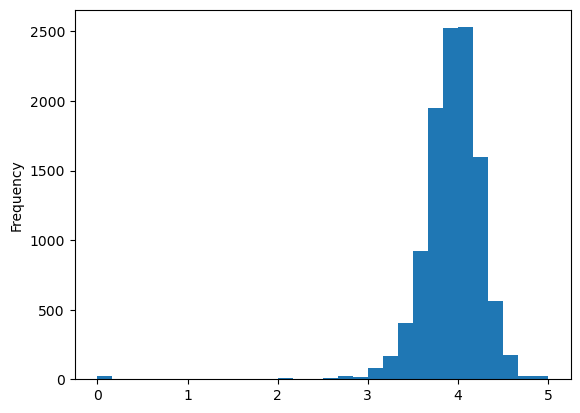

In [41]:
df['average rating'].describe()
df['average rating'].plot(kind='hist', bins=30)

Distribution of the number of pages to check for skewness and outliers

<Axes: ylabel='Frequency'>

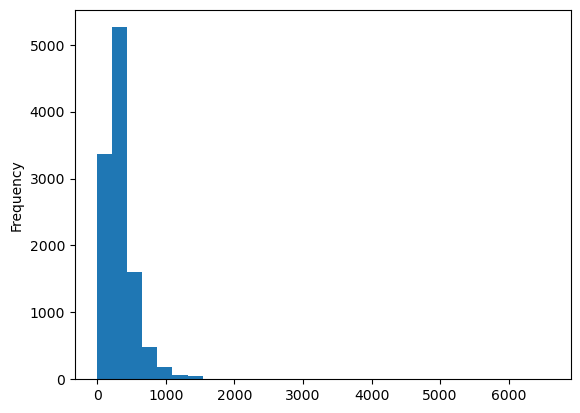

In [43]:
df['num pages'].plot(kind='hist', bins=30)

<Axes: xlabel='publication date'>

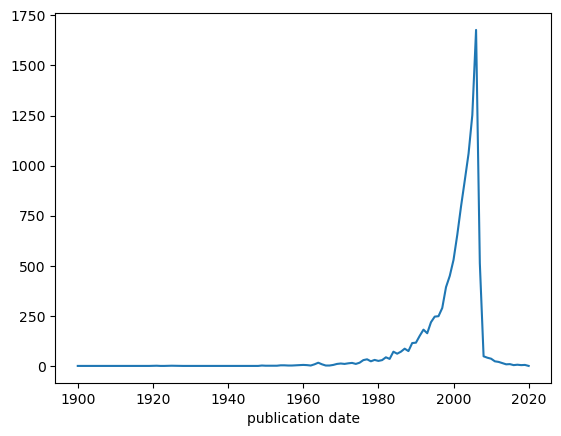

In [44]:
df['publication date'].dt.year.value_counts().sort_index().plot(kind='line')

C:\Users\lenyb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenyb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenyb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenyb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

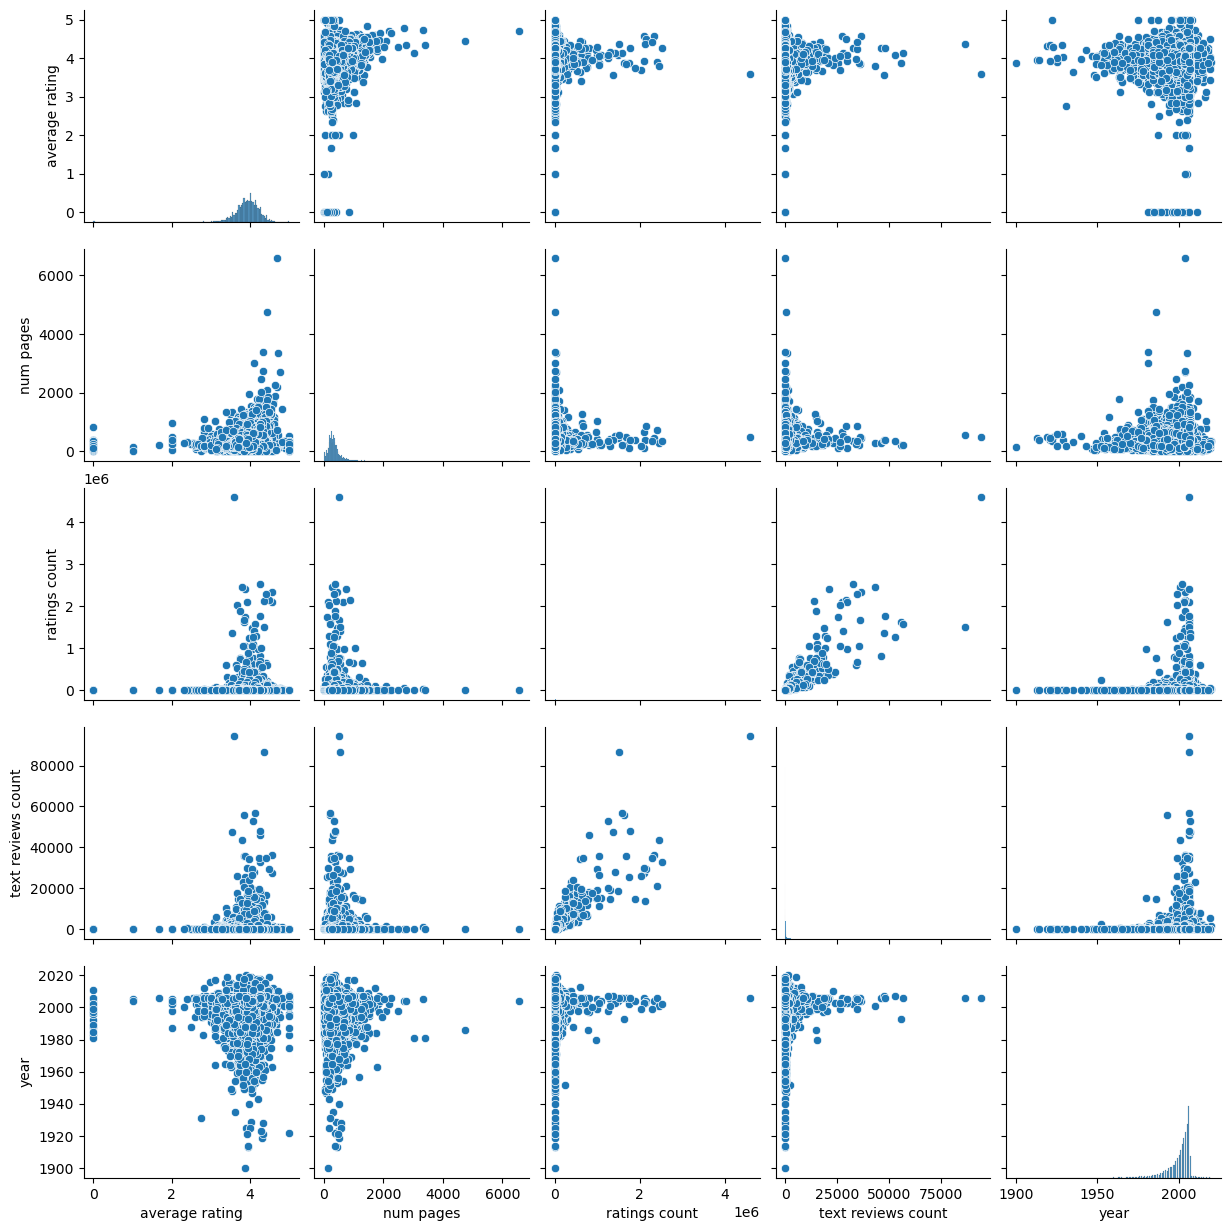

In [45]:
sns.pairplot(df[['average rating', 'num pages', 'ratings count', 'text reviews count', 'year']])

#### Outliers Detection

<Axes: >

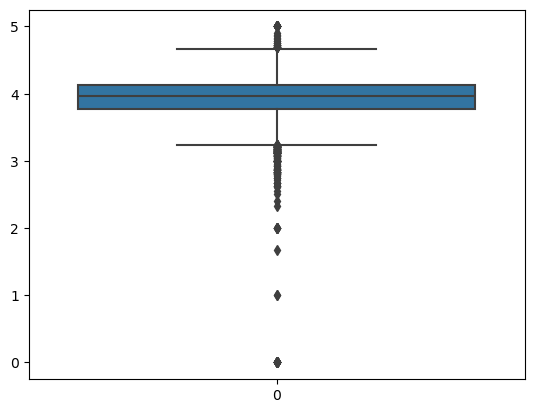

In [47]:
sns.boxplot(df['average rating'])

<Axes: >

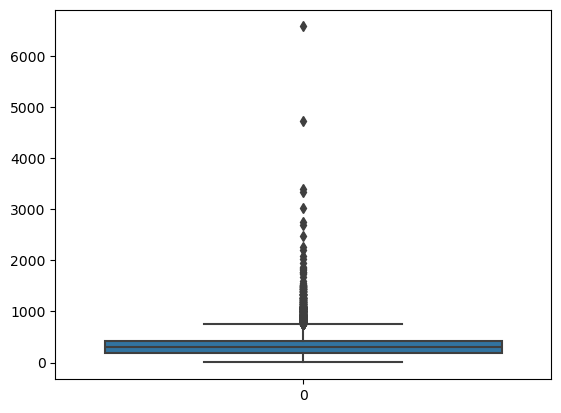

In [48]:
sns.boxplot(df['num pages'])

<Axes: >

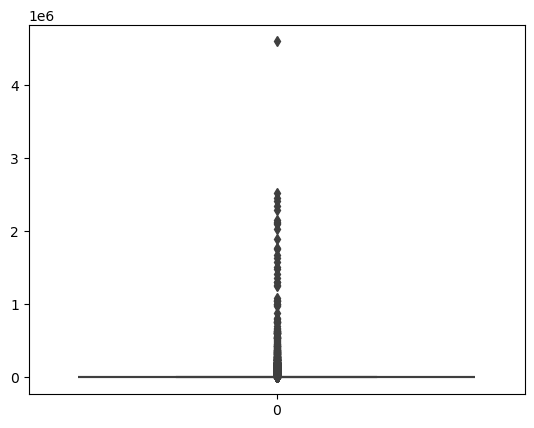

In [49]:
sns.boxplot(df['ratings count'])

#### Distribution Analysis and Visualization

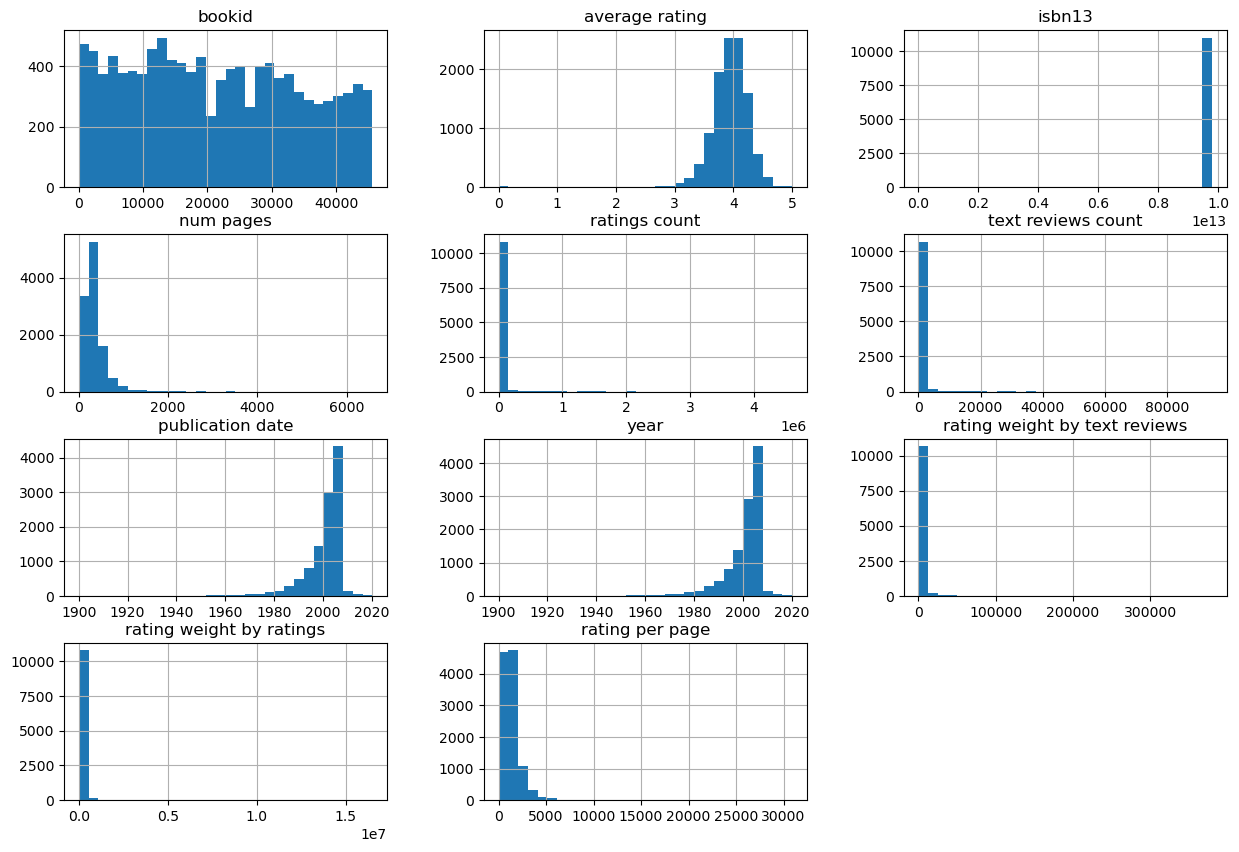

In [51]:
df.hist(figsize=(15,10), bins=30)
plt.show()

The above graph represents the frequency distribution of numeric columns.

In [53]:
# Authors who consistently receive higher ratings.
df.groupby('authors')['average rating'].mean().sort_values(ascending=False).head(10)

authors
Keith Donohue                                           5.0
Laura Driscoll/Alisa Klayman-Grodsky/Eric     Weiner    5.0
Elena N. Mahlow                                         5.0
Middlesex Borough Heritage Committee                    5.0
Dennis Adler/R.L. Wilson                                5.0
Todd Davis/Marc Frey                                    5.0
John  Diamond                                           5.0
Julie Sylvester/David Sylvester                         5.0
Aristophanes/F.W. Hall/W.M. Geldart                     5.0
James E. Campbell                                       5.0
Name: average rating, dtype: float64

In [54]:
# Publishers associated with higher average ratings
df.groupby('publisher')['average rating'].mean().sort_values(ascending=False).head(10)

publisher
Schirmer Mosel                     5.0
University Press of New England    5.0
Boosey & Hawkes Inc                5.0
Texas A&M University Press         5.0
Y Lolfa                            5.0
Academica Press                    5.0
T&T Clark Int'l                    5.0
Raintree                           5.0
Square One Publishers              5.0
Vantage Press                      5.0
Name: average rating, dtype: float64

<Axes: xlabel='year'>

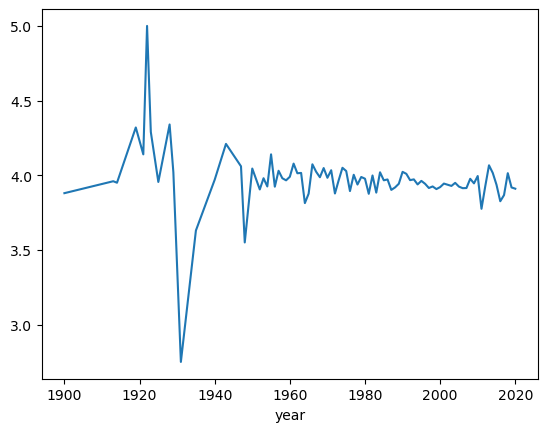

In [55]:
# Visible trends in ratings or number of pages over publication years
df.groupby('year')['average rating'].mean().plot(kind='line')

We need to transform some of the categorical attributes into numerical values so as to do feature selection.

In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
le = LabelEncoder()
df['language code'] = le.fit_transform(df['language code'])

### Feature Selection

Since our dataset has a mix of numerical and categorical features (num pages, ratings count, language code, publisher, etc.), we will be using `Random Forest Feature Importance`. It's easy to implement, works with both numerical and categorical data, and provides good insights into feature importance.

In [61]:
from sklearn.ensemble import RandomForestRegressor

In [62]:
# Dropping irrelevant columns like 'title', 'isbn', 'isbn13', 'authors', 'publication date', etc.
X = df.drop(columns=['average rating', 'title', 'isbn', 'isbn13', 'publication date', 'authors', 'publisher'])
y = df['average rating']

In [63]:
# Training the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

RandomForestRegressor(random_state=42)

In [64]:
# Extracting feature importance
importance = model.feature_importances_
features = X.columns

In [65]:
# Creating a DataFrame for visualization
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importance}).sort_values(by='Importance', ascending=False)

In [66]:
feature_importance

,Feature,Importance
8,rating per page,0.628760
2,num pages,0.304470
7,rating weight by ratings,0.021391
6,rating weight by text reviews,0.011202
3,ratings count,0.011142
0,bookid,0.009537
4,text reviews count,0.006502
5,year,0.006131
1,language code,0.000865


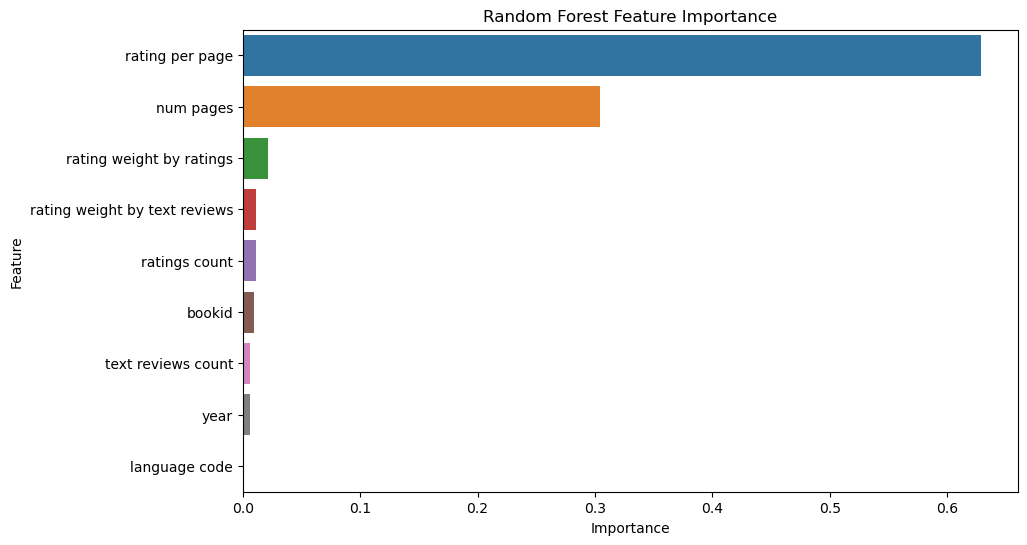

In [67]:
# Plotting the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Random Forest Feature Importance')
plt.show()

The bar plot shows which features are most important based on their contribution to the model. The important features are rating count, num pages, bookid, year, text review count, language code, num_occ

### Model Building

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [71]:
df.columns

Index(['bookid', 'title', 'authors', 'average rating', 'isbn', 'isbn13',
       'language code', 'num pages', 'ratings count', 'text reviews count',
       'publication date', 'publisher', 'year',
       'rating weight by text reviews', 'rating weight by ratings',
       'rating per page'],
      dtype='object')

In [72]:
X = df.drop(columns=['bookid','title', 'authors', 'isbn', 'isbn13', 'publication date', 'publisher','average rating'])
y = df['average rating'].values

In [73]:
df.sample(3)

,bookid,title,authors,average rating,isbn,isbn13,language code,num pages,ratings count,text reviews count,publication date,publisher,year,rating weight by text reviews,rating weight by ratings,rating per page
7061,26922,Affliction,Russell Banks/Pierre Furlan,3.99,2742722807,9782742722808,4,486,63,1,1999-12-29,Babel,1999,3.99,251.37,1939.14
8535,32781,War and the Iliad,Simone Weil/Rachel Bespaloff/Mary McCarthy/Chr...,4.04,1590171454,9781590171455,2,121,532,57,2005-03-31,NYRB Classics,2005,230.28,2149.28,488.84
1015,3447,In the Lake of the Woods,Tim O'Brien,3.78,061870986X,9780618709861,2,303,14655,1211,2006-09-01,Mariner Books,2006,4577.58,55395.90,1145.34


In [74]:
# Splitting the training and testing data in the ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Random Forest Regression

In [76]:
# Training the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [77]:
#Making predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [78]:
# Evaluating the model

# R-squared score
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

In [79]:
r2_test

0.9641325213031047

In [80]:
# Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

In [81]:
mse_test

0.004820679832579173

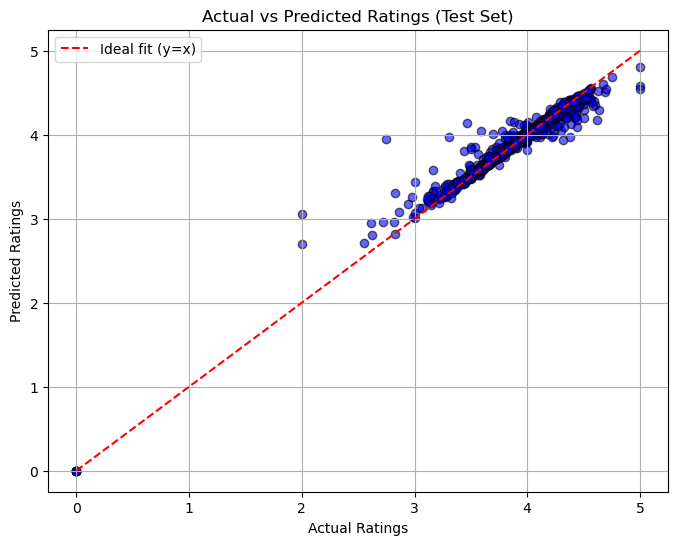

In [82]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='blue', edgecolor='k', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal fit (y=x)')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings (Test Set)')
plt.grid(True)
plt.legend()
plt.show()

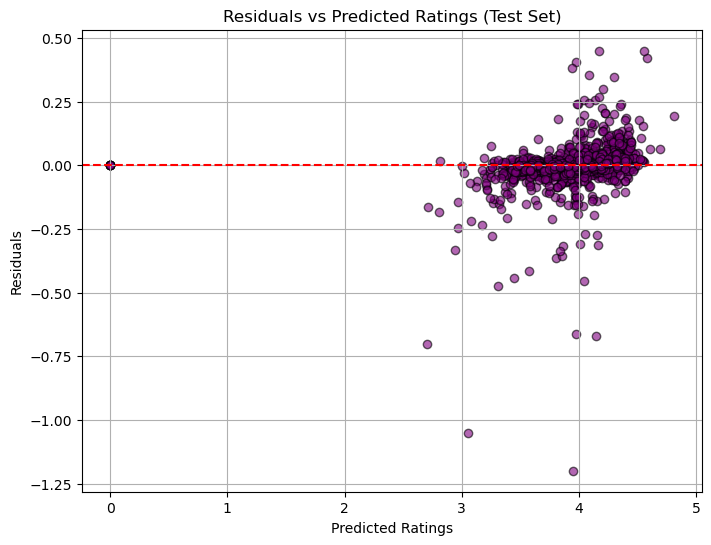

In [83]:
# Residual Plot (difference between actual and predicted)
residuals = y_test - y_pred_test
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_test, residuals, color='purple', edgecolor='k', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Ratings')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Ratings (Test Set)')
plt.grid(True)
plt.show()

##### Evaluation Metrics

In [85]:
# Calculating evaluation metrics
r2_RF = r2_score(y_test, y_pred_test)
mse_RF = mean_squared_error(y_test, y_pred_test)

In [86]:
# Creating a dictionary to store the metrics
metrics = {
    "R-squared (R²)": r2_RF,
    "Mean Squared Error (MSE)": mse_RF,    
}
# Converting the dictionary to a DataFrame for easier plotting
metrics_RF = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])

In [87]:
metrics_RF

,Metric,Value
0,R-squared (R²),0.964133
1,Mean Squared Error (MSE),0.004821


#### XGBoost Model

One commonly used alternative to Random Forest in regression tasks is Gradient Boosting Regressor, which includes models like XGBoost or Gradient Boosting Regressor from sklearn.

In [90]:
import xgboost as xgb

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
X

,language code,num pages,ratings count,text reviews count,year,rating weight by text reviews,rating weight by ratings,rating per page
0,2,652,2095690,27591,2006,126090.87,9577303.30,2979.64
1,2,870,2153167,29221,2004,131202.29,9667719.83,3906.30
2,2,352,6333,244,2003,1078.48,27991.86,1555.84
3,2,435,2339585,36325,2004,165642.00,10668507.60,1983.60
4,2,2690,41428,164,2004,783.92,198025.84,12858.20
...,...,...,...,...,...,...,...,...
11118,2,512,156,20,2004,81.20,633.36,2078.72
11119,2,635,783,56,1988,228.48,3194.64,2590.80
11120,2,415,820,95,1993,376.20,3247.20,1643.40
11121,2,434,769,139,2007,517.08,2860.68,1614.48


In [93]:
xgboost_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgboost_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [94]:
y_pred_train = xgboost_model.predict(X_train)
y_pred_test = xgboost_model.predict(X_test)

In [95]:
# Calculating evaluation metrics
r2_XGB = r2_score(y_test, y_pred_test)
mse_XGB = mean_squared_error(y_test, y_pred_test)

In [96]:
# Creating a dictionary to store the metrics
metrics = {
    "R-squared (R²)": r2_XGB,
    "Mean Squared Error (MSE)": mse_XGB,    
}
# Converting the dictionary to a DataFrame for easier plotting
metrics_XGB = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])

In [97]:
metrics_XGB

,Metric,Value
0,R-squared (R²),0.924066
1,Mean Squared Error (MSE),0.010206


#### AdaBoost Regressor

In [99]:
from sklearn.ensemble import AdaBoostRegressor

In [100]:
model = AdaBoostRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=100, random_state=42)

In [101]:
y_pred_test = model.predict(X_test)

In [102]:
# Calculating evaluation metrics
r2_Ada = r2_score(y_test, y_pred_test)
mse_Ada = mean_squared_error(y_test, y_pred_test)

In [103]:
# Creating a dictionary to store the metrics
metrics = {
    "R-squared (R²)": r2_Ada,
    "Mean Squared Error (MSE)": mse_Ada,    
}
# Converting the dictionary to a DataFrame for easier plotting
metrics_Ada = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])

In [104]:
metrics_Ada

,Metric,Value
0,R-squared (R²),0.378954
1,Mean Squared Error (MSE),0.083470


#### Linear Regression 

In [106]:
from sklearn.linear_model import LinearRegression

In [107]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [108]:
y_pred_test = model.predict(X_test)

In [109]:
# Calculating evaluation metrics
r2_LR = r2_score(y_test, y_pred_test)
mse_LR = mean_squared_error(y_test, y_pred_test)

In [110]:
# Creating a dictionary to store the metrics
metrics = {
    "R-squared (R²)": r2_LR,
    "Mean Squared Error (MSE)": mse_LR,    
}
# Converting the dictionary to a DataFrame for easier plotting
metrics_LR = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])

In [111]:
metrics_LR

,Metric,Value
0,R-squared (R²),0.592646
1,Mean Squared Error (MSE),0.054749


C:\Users\lenyb\AppData\Local\Temp\ipykernel_24852\2807114659.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(models, rotation=15, ha='right')
C:\Users\lenyb\AppData\Local\Temp\ipykernel_24852\2807114659.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(models, rotation=15, ha='right')


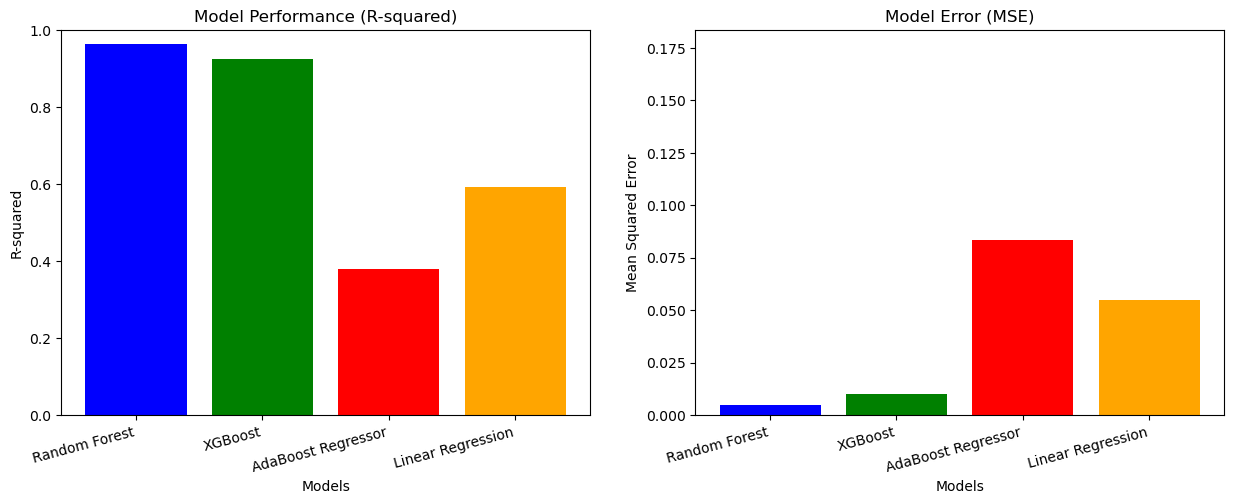

In [112]:
# Plotting model performance and error
models = ['Random Forest', 'XGBoost', 'AdaBoost Regressor', 'Linear Regression']
r_squared = [r2_RF, r2_XGB, r2_Ada, r2_LR]
mse = [mse_RF, mse_XGB, mse_Ada, mse_LR]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.bar(models, r_squared, color=['blue', 'green', 'red', 'orange'])
ax1.set_title('Model Performance (R-squared)')
ax1.set_xlabel('Models')
ax1.set_ylabel('R-squared')
ax1.set_ylim(0, 1)
ax1.set_xticklabels(models, rotation=15, ha='right')
ax2.bar(models, mse, color=['blue', 'green', 'red', 'orange'])
ax2.set_title('Model Error (MSE)')
ax2.set_xlabel('Models')
ax2.set_ylabel('Mean Squared Error')
ax2.set_ylim(0, max(mse) + 0.1)
ax2.set_xticklabels(models, rotation=15, ha='right')
plt.show()